# Kannusteet, työllistymis- ja efektiivinen veroaste
Antti Tanskanen,
1.2.2022

Efektiivinen veroaste kertoo, paljonko ansaituista lisäansioista menee verojen kasvamiseen ja etuuksien pienenemisen. Työllistymisveroaste taas kertoo, mikä osuus siirtyminen työttömyydestä työhön tuomista palkkatuloista menee veroihin ja etuuksien pienenemiseen. Tulokset ovat erilaisille perheille erilaisia, erityisesti johtuen erilaisista etuuksista. Työllistymisveroaste määritellään

$$
V=1-\frac{T_2-T_1}{\Delta t},
$$

missä $T_1$ on nettotulot työttömänä sisältäen etuudet, $T_2$ on nettotulot työllistyneenä, $\Delta t$ on työstä saatava palkka. Efektiivinen marginaalivero lasketaan samalla kaavalla.

Jos esimerkiksi työttömänä käteen jää 100 e/kk, ja työllistyneenä 500 euron kuukausipalkasta jää 300 e/kk käteen verojen ja etuuksien pienentymisen jälkeen, on työllistymisveroaste 60 prosentti.

Efektiivinen marginaalivero kertoo, paljonko lisätulosta menee veroihin yms. Jos tulotaso nyt on 1500 e/kk ja siitä jää käteen etuudet mukaanlukien 1400 e/kk. Jos lisätyöllä bruttotulon saa nostettua 2000 euroon kuukaudessa, josta jää 1600 e/kk käteen (etuudet mukana), on efektiivinen veroaste 60 prosenttia.

Tarkempaa tietoa veroasteiden laskennasta löytyy esimerkiksi julkaisuista Kärkkäinen ja Tervola [2018] ja Viitamäki [2015].

## Python-kirjasto

Tässä työkirjassa esitellään Python-kirjasto fin_benefit, jonka avulla on helppo tarkastella käteen jäävien tulojen osuutta, efektiivistä marginaaliveroa ja työllistymisveroastetta. Kirjasto on melko suppea, noin 2 000 riviä koodia yhteensä.

In [1]:
# for Colab, install fin_benefits from Github
#!pip install git+https://github.com/ajtanskanen/benefits.git

In [2]:
# haetaan tarpeelliset kirjastot
import fin_benefits # määrittelee luokan, jossa on sosiaaliturvafunktiot yms
import numpy as np 

# kuvat suuremmiksi
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]

/Users/anttitanskanen/opt/miniconda3/envs/py37/lib/python3.7/site-packages/ale_py/roms/utils.py:90: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for external in metadata.entry_points().get(self.group, []):


## Tyyppitapauksia ja niiden korvausasteita

Laskee työllisyysveroaste, työnteon efektiivisen marginaalivero ja käteen jäävä ansio kirjaston avulla. Valitaan ensin tyyppitapaus. Muuttuja p kertoo tarkat tiedot laskennankohteesta, selite sisältää kuvauksen siitä ja parametri tulosta kehottaa printtaamaan selite:en.

In [3]:
p,selite=fin_benefits.perheparametrit(perhetyyppi=57,tulosta=True)

2 aikuista, ei lapsia. Työtön (työmarkkinatuki), puoliso työtön (työmarkkinatuki)


In [4]:
fin_benefits.print_examples()

Tapaus 1:
1 aikuinen, ei lapsia. Töissä, ei puolisoa

Tapaus 2:
1 aikuinen, ei lapsia. Työtön (ansiopvraha, peruste 2500 e/kk), ei puolisoa

Tapaus 3:
1 aikuinen, ei lapsia. Työtön (työmarkkinatuki), ei puolisoa

Tapaus 4:
1 aikuinen ja 1 lapsi. Töissä, ei puolisoa

Tapaus 5:
2 aikuista ja 1 lapsi. Töissä, puoliso töissä (1250 e/kk).

Tapaus 6:
2 aikuista ja 2 lasta. Töissä, puoliso töissä (1250 e/kk).

Tapaus 7:
2 aikuista ja 1 lapsi. Työtön (ansiopvraha, peruste 2500 e/kk), puoliso työtön (työmarkkinatuki)

Tapaus 8:
2 aikuista ja 1 lapsi. Töissä, puoliso töissä (1250 e/kk).

Tapaus 9:
2 aikuista ja 3 lasta. Töissä, puoliso töissä (1250 e/kk).

Tapaus 10:
1 aikuinen ja 1 lapsi. Työtön (ansiopvraha, peruste 1500 e/kk), ei puolisoa

Tapaus 11:
1 aikuinen ja 3 lasta. Työtön (ansiopvraha, peruste 2500 e/kk), ei puolisoa

Tapaus 12:
2 aikuista ja 2 lasta. Työtön (työmarkkinatuki), puoliso töissä (1250 e/kk).

Tapaus 13:
2 aikuista ja 2 lasta. Työtön (ansiopvraha, peruste 1500 e/kk), puoli

Tarkastetaan vielä, millaisia parametrejä p:hen on syötetty

Itse laskenta koostuu kolmesta rivistä koodia. Alustetaan objektia ben kirjastosta fin_benefits. Tämän jälkeen sitä voi kutsua laskemaan marginaalit ja plottamaan ne.

In [5]:
# tarkasteluvuosi
year=2022

# Luokka Benefits sisältää etuuskoodin
ben=fin_benefits.Benefits(year=year)

# Luokka Marginals sisältää marginaalien plottausfunktiot
marg=fin_benefits.Marginals(ben,year=year)

Ja sitten lasketaan käteen jäävä tulo, efektiivinen marginaalivero, työllistymisveroaste ja osatyöstä kokoaikatyöhön siirtymän efektiivinen marginaalivero. Laskelmat tehdään 1 e/kk askelvälillä. Efektiivinen marginaalivero lasketaan 100 e/kk lisätulolla. Osatyöstä kokoaikatyöhön siirryttäessä palkka kaksinkertaistuu.

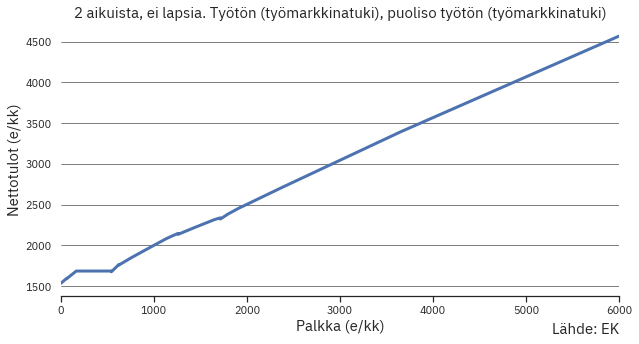

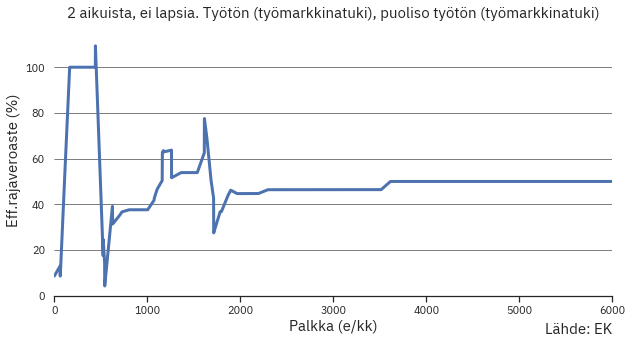

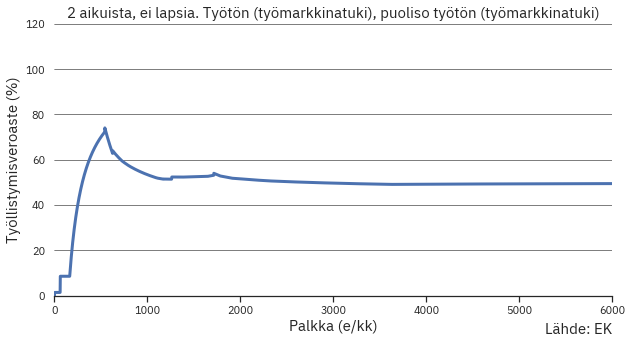

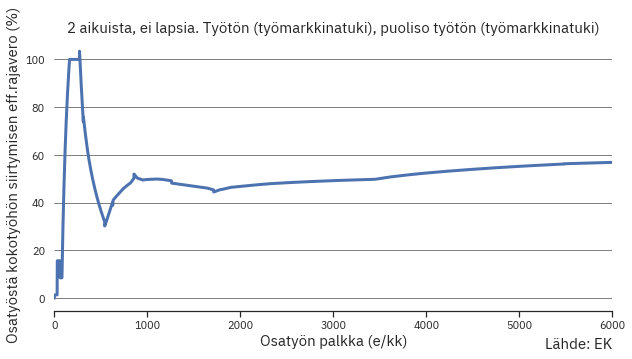

In [6]:

# ja lasketaan & plotataan tulokset
basenetto,baseeff,basetva,baseosatva=marg.laske_ja_plottaa(p)

Jaotellaan vielä marginaalit niiden lähteiden mukaan. Nettopalkka sisältää kaikkien talouden aikuisten nettopalkat, kun taas vaaka-akselin Palkka tarkoittaa työllistyvän palkkaa.

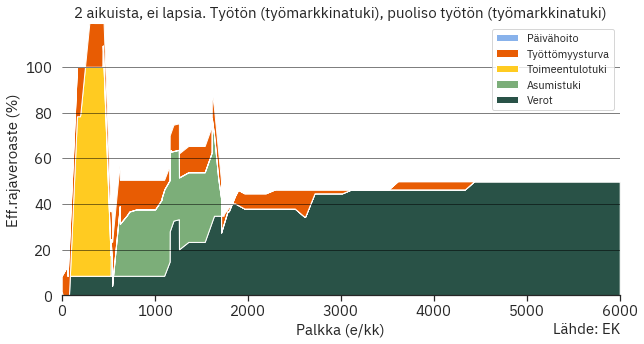

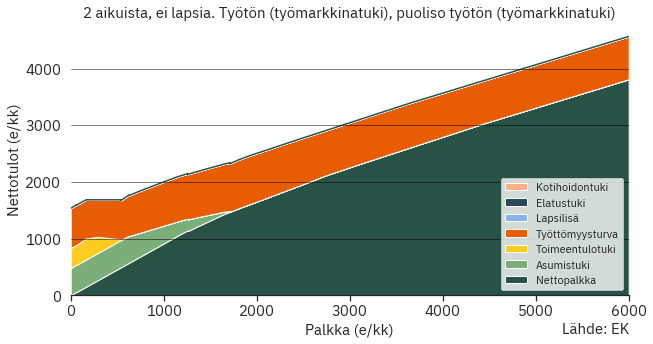

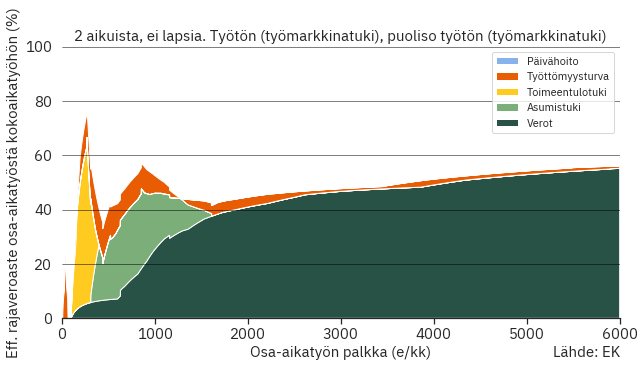

In [7]:
# ja lasketaan & plotataan tulokset
marg.laske_ja_plottaa_marginaalit(p,plot_tva=False,figname='yksinhuoltaja_gs_',
                                 grayscale=False,incl_perustulo=False,incl_elake=False)

# Etuuslajien muokkaus
Etuuslajien muokkaaminen on helppoa: kopioidaan luokka Benefits ja korvataan haluttu etuusmuoto uudella.

Esimerkin vuoksi korvataan toimeentulotuki yhteensovittamattomalla 750 e/kk tuella. Tämä on eräänlainen perustulo, mutta se ei ole kustannusneutraali ilman muutoksia verotukseen

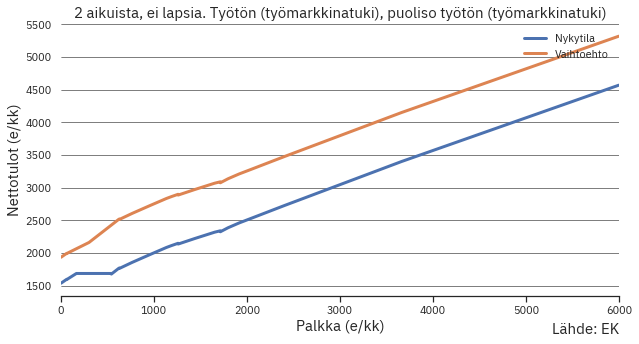

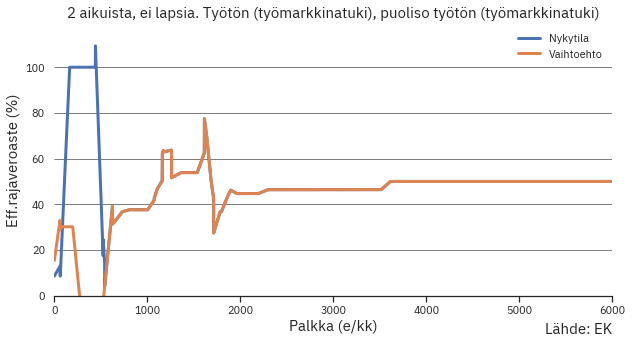

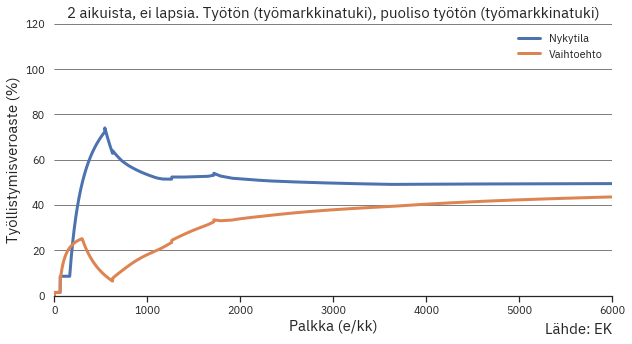

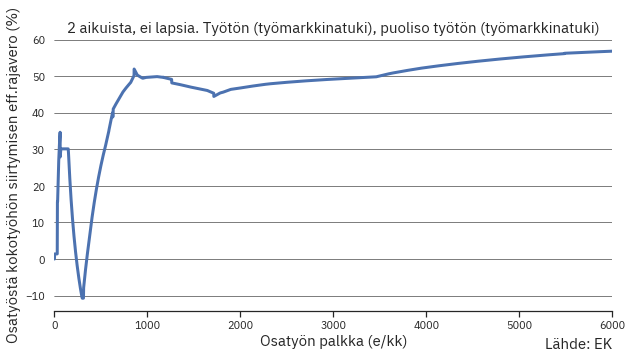

In [8]:
## uusi toimeentulotuki

# Ensin kloonataan Luokka Benefits() sisältää koodin
class Suurempituki(fin_benefits.Benefits):
    def toimeentulotuki(self,omabruttopalkka,omapalkkavero,puolison_bruttopalkka,puolison_palkkavero,muuttulot,verot,asumismenot,muutmenot,p):
        return 750

# Luokka Suurempituki() sisältää koodin
perustulo=Suurempituki()

# ja tätä vastaava plottausluokka
margp=fin_benefits.Marginals(perustulo,year=year)

# ja lasketaan & plotataan tulokset
_,_,_,_=margp.laske_ja_plottaa(p,basenetto=basenetto,baseeff=baseeff,basetva=basetva)

Perustuloon liittyy myös kasvavan etuusmenon rahoitus. Tämä toteutetaan nostamalla veroja. 

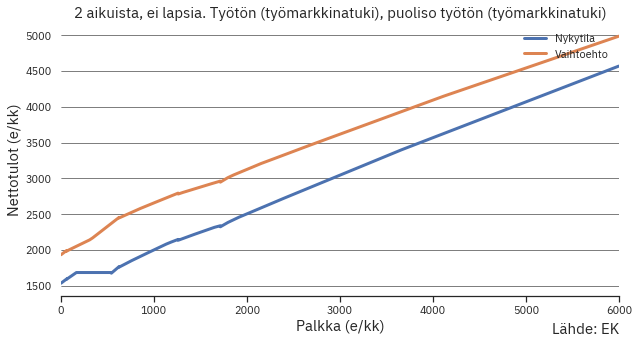

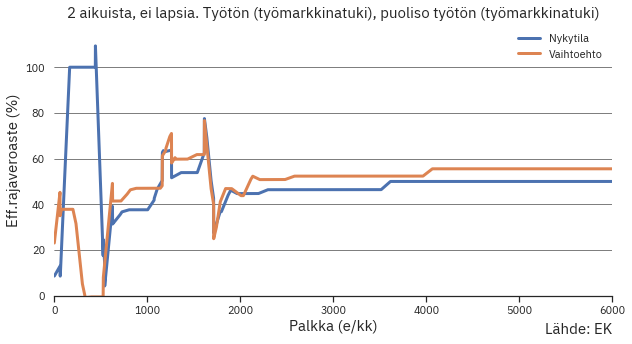

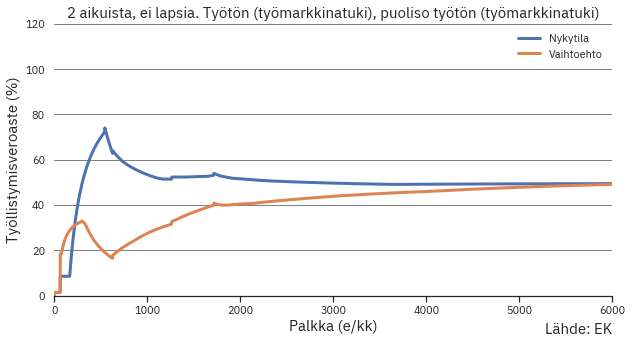

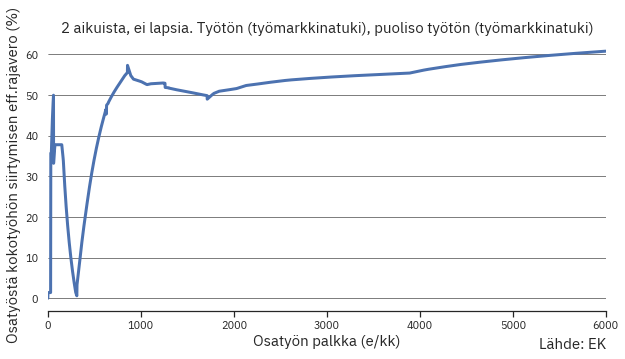

In [9]:
## Lisätään mukaan verotus

# Luokka Suurempituki() sisältää koodin
perustulo_ml_verotus=Suurempituki(additional_tyel_premium=0.10)

# ja tätä vastaava plottausluokka
margp2=fin_benefits.Marginals(perustulo_ml_verotus,year=year)

# ja lasketaan & plotataan tulokset
_,_,_,_=margp2.laske_ja_plottaa(p,basenetto=basenetto,baseeff=baseeff,basetva=basetva)

# Esimerkki tuen muuttamisesta


## Muokataan asumistukea
Entä jos asumistuessa suojaosa olisi perhekohtainen ja palkkatuloa kohdeltaisiin lievemmin kuin muuta tuloa?

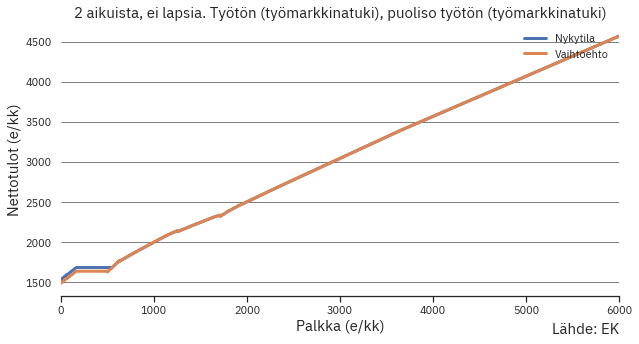

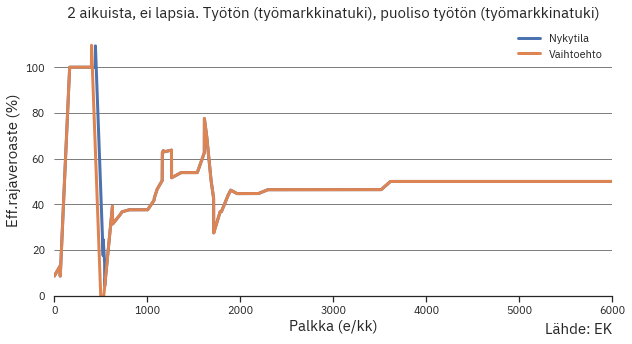

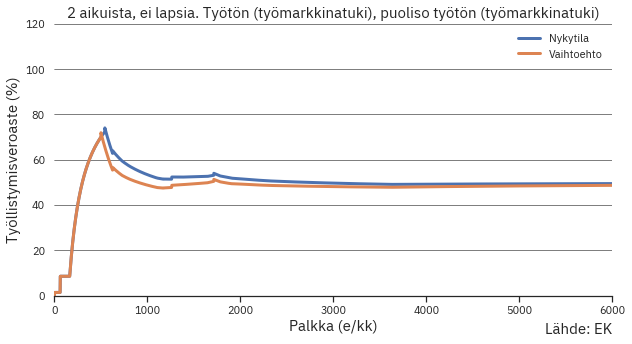

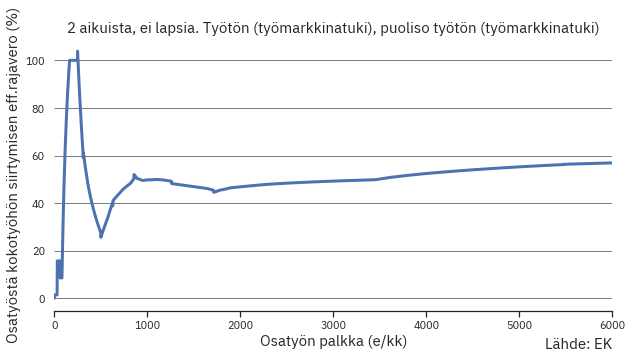

In [10]:
## uusi asumistuki

# Ensin kloonataan luokka Benefits(), joka sisältää koodin
class Parempituki(fin_benefits.Benefits):
    def asumistuki(self,palkkatulot,muuttulot,vuokra,p):
        max_menot=np.array([[537, 520, 413, 364],[778, 746, 602, 530],[990, 941, 764, 678],[1157, 1097, 906, 808]])
        max_lisa=np.array([144, 137, 124, 119])
        max_meno=max_menot[min(3,p['aikuisia']+p['lapsia']-1),p['kuntaryhma']]+max(0,p['aikuisia']+p['lapsia']-4)*max_lisa[p['kuntaryhma']]

        prosentti=0.70
        suojaosa=300 # per talous, ei per aikuiset
        perusomavastuu=max(0,0.47*(0.8*max(0,palkkatulot-suojaosa)+0.9*muuttulot-(542+90*p['aikuisia']+200*p['lapsia'])))
        tuki=max(0,(min(max_meno,vuokra)-perusomavastuu)*prosentti);

        return tuki
    
    def toimeentulotuki(self,omabruttopalkka,omapalkkavero,puolison_bruttopalkka,puolison_palkkavero,muuttulot,verot,asumismenot,muutmenot,p,omavastuuprosentti=0.0):
    
        # kutsutaan alkuperäistä 7%:n omavastuuprosenttikertoimella
        return super().toimeentulotuki(omabruttopalkka,omapalkkavero,puolison_bruttopalkka,puolison_palkkavero,muuttulot,verot,asumismenot,muutmenot,p,omavastuuprosentti=0.07)

# Luokka Parempituki() sisältää koodin
tuki=Parempituki()

# ja tätä vastaava plottausluokka
tukiplot=fin_benefits.Marginals(tuki,year=year)

# ja lasketaan & plotataan tulokset
_,_,_,_=tukiplot.laske_ja_plottaa(p,basenetto=basenetto,baseeff=baseeff,basetva=basetva)

# Määritellään uusi esimerkkitapaus

Ennaltamääriteltyjen tyyppitapausten lisäksi on helppo määritellä uusia. 

In [11]:
p={'tyoton': 1, 'ika': 30, 'saa_ansiopaivarahaa': 1, 'piikit_pois': 0, 't': 0, 'vakiintunutpalkka': 1500, 
   'elakkeella': 0, 'asumismenot_toimeentulo': 1150, 'asumismenot_asumistuki': 1024, 'lapsia': 2, 
   'lapsia_paivahoidossa': 2, 'aikuisia': 2, 'veromalli': 0, 'kuntaryhma': 2, 'lapsia_kotihoidontuella': 0, 
   'alle3v': 0, 'ansiopvrahan_suojaosa': 1, 'ansiopvraha_lapsikorotus': 1, 'puoliso_tulot': 2500, 
   'puoliso_tyoton': 0, 'puoliso_vakiintunutpalkka': 0, 'puoliso_saa_ansiopaivarahaa': 0, 
   'puolison_vakiintunutpalkka': 2500, 'asumismenot_yhdistetty': 1150, 'puolison_tyottomyyden_kesto':10, 
   'tyottomyyden_kesto': 10, 'aitiysvapaalla': 0, 'isyysvapaalla': 0, 'kotihoidontuella': 0,
   'puoliso_elakkeella': 0, 'puoliso_opiskelija': 0,'puoliso_tyoelake': 0, 'puoliso_aitiysvapaalla': 0,
   'puoliso_isyysvapaalla': 0,'puoliso_sairauspaivarahalla': 0, 'puoliso_kotihoidontuella': 0}
print(fin_benefits.tee_selite(p))

2 aikuista ja 2 lasta. Työtön (ansiopvraha, peruste 1500 e/kk), puoliso töissä (2500 e/kk).


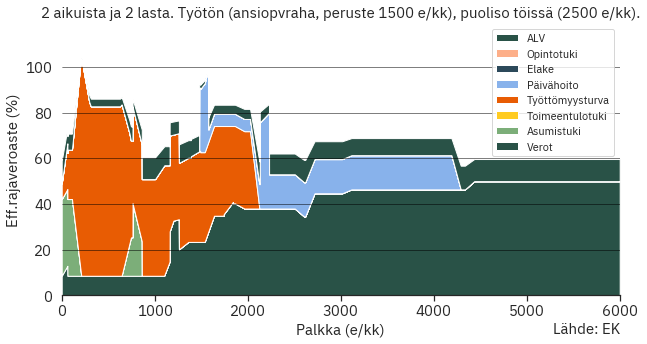

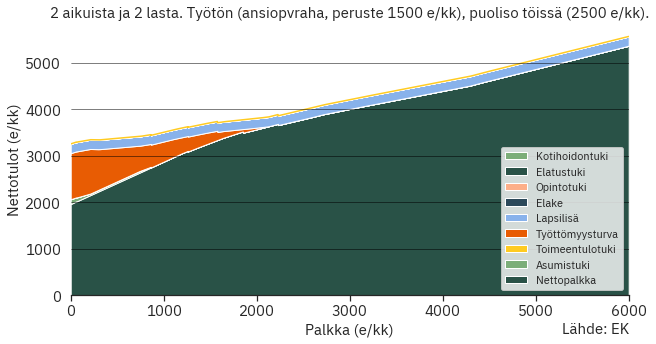

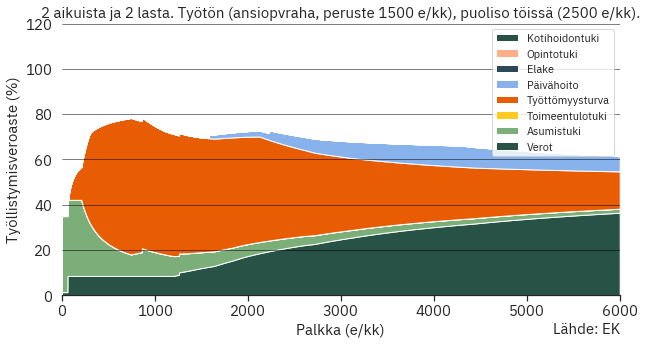

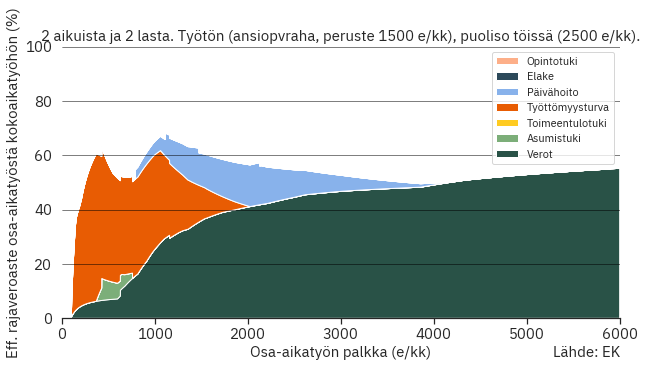

In [12]:
# ja lasketaan & plotataan tulokset
marg.laske_ja_plottaa_marginaalit(p)

# Piikit efektiivisessä marginaaliverossa

Riippuen siitä, millaisia lisätuloja oletetaan, muuttuvat tulokset. Peruslaskelmassa dt=100 e/kk, joten vrrataan sitä dt=1 e/kk:hon.

In [15]:
p3,selite=fin_benefits.perheparametrit(perhetyyppi=13,tulosta=True)

#base2netto,base2eff,base2tva,_=ben.laske_ja_plottaa(p3,plottaa=False)

base2netto,base2eff,base2tva,_=marg.laske_ja_plottaa_marginaalit(p3,plottaa=False)

# ja lasketaan & plotataan tulokset
dt=10
_,_,_,_=marg.laske_ja_plottaa(p3,basenetto=base2netto,baseeff=base2eff,basetva=base2tva,\
                           dt=dt,otsikko='dt=10 e/kk',otsikkobase='dt=100 e/kk')

2 aikuista ja 2 lasta. Työtön (ansiopvraha, peruste 1500 e/kk), puoliso töissä (2500 e/kk).


TypeError: cannot unpack non-iterable NoneType object

Kuten yllä olevat kuvat näyttävät, on valitulla lisäansioiden määrällä vaikutusta tuloksiin efektiivisessä marginaaliverossa, mutta ei työllistymisveroasteessa tai käteen jäävässä tulonmäärässä. Työllistymisveroaste ei riipu lisäansioiden määrästä, joten siinä ei pidäkään olla piikkejä. Jos lisäansio on pieni, ovat piikit efektiivisessä marginaaliverossa suuria johtuen kynnyksistä erilaisissa maksuissa, koska tällöin ansionlisäys voi viedä tulot yli kynnyksen.

# Eläkkeellä olevat

Verrataan työssäolevien nettotuloja työskentelevien vanhuuseläkeläisten nettotuloihin.

1 aikuinen, ei lapsia. Vanhuuseläkkeellä (työeläke 1500 e/kk), ei puolisoa


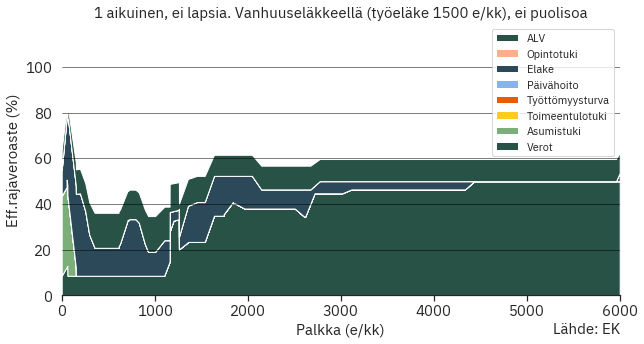

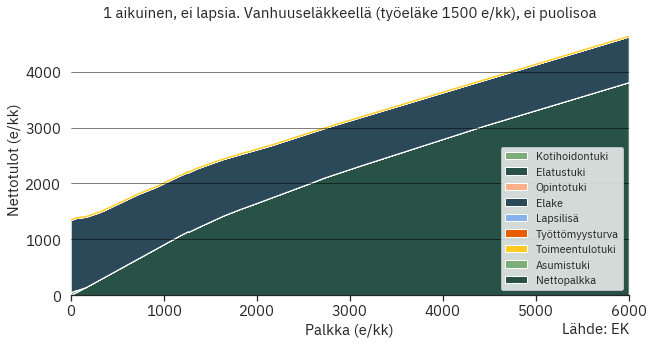

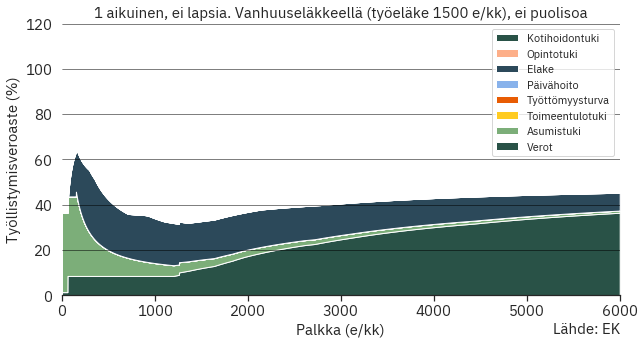

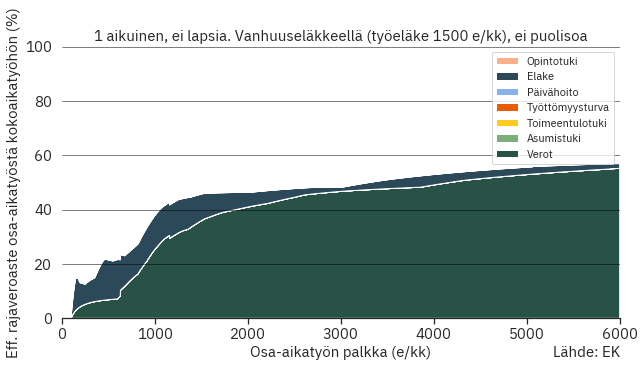

1 aikuinen, ei lapsia. Töissä, ei puolisoa


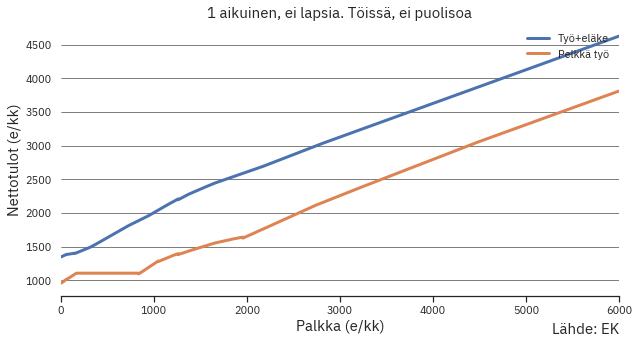

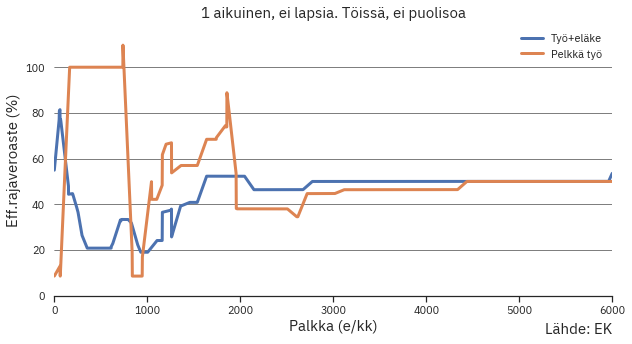

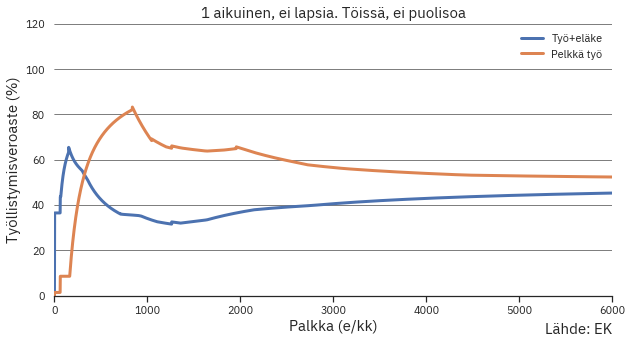

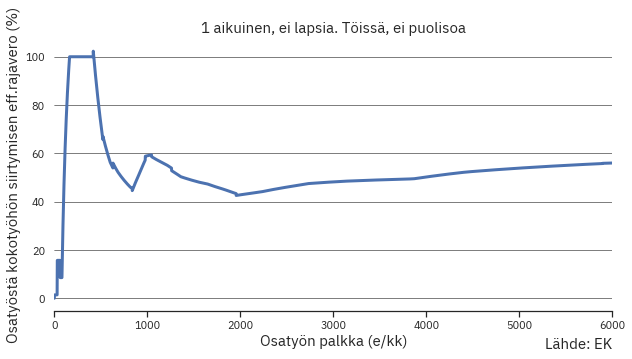

In [18]:
### Luokka Benefits() sisältää koodin
ben=fin_benefits.Benefits()

# Luokka Marginals sisältää marginaalien plottausfunktiot
marg=fin_benefits.Marginals(ben,year=year)

p,selite=fin_benefits.perheparametrit(perhetyyppi=33,tulosta=True)

# ja lasketaan & plotataan tulokset
basenetto,baseeff,basetva,baseosatva=marg.laske_ja_plottaa_marginaalit(p,ret=True)

p2,selite=fin_benefits.perheparametrit(perhetyyppi=34,tulosta=True)

# ja lasketaan & plotataan tulokset
_,_,_,_=marg.laske_ja_plottaa(p2,basenetto=basenetto,baseeff=baseeff,basetva=basetva,\
                           otsikko='Pelkkä työ',otsikkobase='Työ+eläke')

# Kunnallisveron lasku ja kannusteet

Testataan, miten kunnallisveron nosto +5 %-yksikköä ja lasku -5 %-yksikköä vaikuttaisi kannusteisiin.

In [ ]:
# Luokka Benefits() sisältää koodin
ben1=fin_benefits.Benefits()
ben2=fin_benefits.Benefits(additional_kunnallisvero=-0.20)

# Luokka Marginals sisältää marginaalien plottausfunktiot
marg1=fin_benefits.Marginals(ben1,year=year)
marg2=fin_benefits.Marginals(ben2,year=year)

# Määritellään perhetyypit
p1,selite=fin_benefits.perheparametrit(perhetyyppi=1,tulosta=True)

p1['t']=0
p1['vakiintunutpalkka']=1500

# ja lasketaan & plotataan tulokset
basenetto1,baseeff1,basetva1,baseosatva1=marg1.laske_ja_plottaa_marginaalit(p1,ret=True,plottaa=False,max_salary=2500)

# ja lasketaan & plotataan tulokset
_,_,_,_=ben2.laske_ja_plottaa(p1,basenetto=basenetto1,baseeff=baseeff1,basetva=basetva1,
                              otsikko='Työssä, -20% kunnallisvero',otsikkobase='Työssä, nykytila',
                              max_salary=2500,figname='kannusteet_työssä',grayscale=True)

# ja lasketaan & plotataan tulokset
p2,selite=fin_benefits.perheparametrit(perhetyyppi=2,tulosta=True)
p2['t']=1250
p2['vakiintunutpalkka']=1500
basenetto2,baseeff2,basetva2,baseosatva2=marg1.laske_ja_plottaa_marginaalit(p2,ret=True,plottaa=False,max_salary=2500)
_,_,_,_=marg2.laske_ja_plottaa(p2,basenetto=basenetto2,baseeff=baseeff2,basetva=basetva2,
                              otsikko='Työtön, -20% kunnallisvero',otsikkobase='Työtön, nykytila',
                              max_salary=2500,figname='kannusteet_työtön',grayscale=True)




In [ ]:
# Luokka Benefits() sisältää koodin
ben1=fin_benefits.Benefits()
ben2=fin_benefits.Benefits(additional_tyel_premium=0.05)

# Määritellään perhetyypit
p1,selite=fin_benefits.perheparametrit(perhetyyppi=1,tulosta=True)

p1['t']=0
p1['vakiintunutpalkka']=1500

# ja lasketaan & plotataan tulokset
basenetto1,baseeff1,basetva1,baseosatva1=ben1.laske_ja_plottaa_marginaalit(p1,ret=True,plottaa=False,max_salary=2500)

# ja lasketaan & plotataan tulokset
_,_,_,_=ben2.laske_ja_plottaa(p1,basenetto=basenetto1,baseeff=baseeff1,basetva=basetva1,
                              otsikko='Työssä, +5% tyel-maksu',otsikkobase='Työssä, nykytila',
                              max_salary=2500,figname='kannusteet_työssä')

# ja lasketaan & plotataan tulokset
p2,selite=fin_benefits.perheparametrit(perhetyyppi=2,tulosta=True)
p2['t']=1250
p2['vakiintunutpalkka']=1500
basenetto2,baseeff2,basetva2,baseosatva2=ben1.laske_ja_plottaa_marginaalit(p2,ret=True,plottaa=False,max_salary=2500)
_,_,_,_=ben2.laske_ja_plottaa(p2,basenetto=basenetto2,baseeff=baseeff2,basetva=basetva2,
                              otsikko='Työtön, -5% tyel-maksu',otsikkobase='Työtön, nykytila',
                              max_salary=2500,figname='kannusteet_työtön')





# Kokoelma esimerkkitapauksia

In [ ]:
# tämän laskenta on aika hidasta
plt.rcParams['figure.figsize'] = [13, 35]
ben.laske_ja_plottaa_hila(type='tva',maxn=31,dire='')
plt.rcParams['figure.figsize'] = [10, 5]

In [ ]:
# tämän laskenta on aika hidasta
plt.rcParams['figure.figsize'] = [13, 35]
ben.laske_ja_plottaa_hila(type='eff',maxn=31,dire='')
plt.rcParams['figure.figsize'] = [10, 5]

In [ ]:
# tämän laskenta on aika hidasta
plt.rcParams['figure.figsize'] = [13, 35]
ben.laske_ja_plottaa_hila(type='tulot',max_salary=6000,maxn=31,dire='')
plt.rcParams['figure.figsize'] = [10, 5]

# Kirjallisuus

[1] Viitamäki, H. Työnteon kannustimet - mitä jää käteen? VATT muistiot 50, https://vatt.fi/documents/2956369/3012213/muistio_50.pdf, 2015

[2] Kärkkäinen, O., Tervola, J. Talouspolitiikan vaikutukset tuloeroihin ja työllisyyteen 2015–2018, Valtioneuvoston selvitys- ja tutkimustoiminnan julkaisusarja 59/2018, http://julkaisut.valtioneuvosto.fi/handle/10024/161061, 2018